<a href="https://colab.research.google.com/github/Souha-Kabtni/Celestial_Bodies_Detection/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Import packages
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(transform_output='pandas')

# Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline

# Import the Algorithms to be used for modeling
from sklearn.ensemble import RandomForestClassifier   # import Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier   # import KNN Classifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Import Classifcation Matrics for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Upload the file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


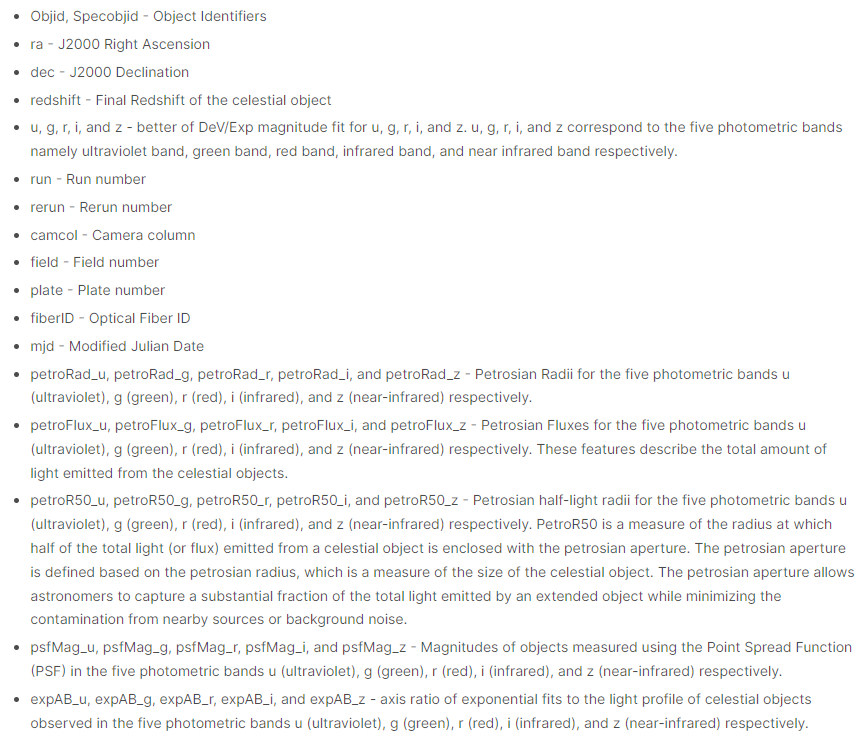

In [3]:
# Read the fil with pandas
df = pd.read_csv('/content/drive/MyDrive/Coding_Dojo/Stack 2/SDSS_DR18.csv')
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,301,5,462,288,52000,456,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,301,5,467,289,51990,322,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,301,5,467,288,52000,614,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,301,5,467,2558,54140,414,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,301,5,467,2558,54140,403,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


### **1. Source of data:**

 + **Kaggle** using this link: https://www.kaggle.com/datasets/diraf0/sloan-digital-sky-survey-dr18 (The link also provides a detailed description of each Feature used in the dataset which will be refered to as my Data Dictionary)

### **2. Brief description of data:**

 + This dataset consists of 100,000 observations from the Data Release (DR) 18 of the Sloan Digital Sky Survey (SDSS). Each observation is described by 42 features and 1 class column classifying the observation as either a Star, Galaxy or Quasar (Taken from Kaggle).

### **3. What is the target?**

 + Class column that classifies stars, galaxies, and quasars based on their spectral characteristics

### **4. What does one row represent?**(A person? A business? An event? A product?)

 + Each row represents an event (the spectral characteristics of the observation).

### **5. Is this a classification or regression problem?**

 + It is a classification problem.

### **6. How many features does the data have?**

 + There are 42 features.

### **7. How many rows are in the dataset?**

 + There are 100,000 rows.

### **8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

 + The data seems to be cleaned. However that are a couple of problems that I might face:

In [4]:
# General Look at the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   objid        100000 non-null  float64
 1   specobjid    100000 non-null  float64
 2   ra           100000 non-null  float64
 3   dec          100000 non-null  float64
 4   u            100000 non-null  float64
 5   g            100000 non-null  float64
 6   r            100000 non-null  float64
 7   i            100000 non-null  float64
 8   z            100000 non-null  float64
 9   run          100000 non-null  int64  
 10  rerun        100000 non-null  int64  
 11  camcol       100000 non-null  int64  
 12  field        100000 non-null  int64  
 13  plate        100000 non-null  int64  
 14  mjd          100000 non-null  int64  
 15  fiberid      100000 non-null  int64  
 16  petroRad_u   100000 non-null  float64
 17  petroRad_g   100000 non-null  float64
 18  petroRad_i   100000 non-n

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,301,5,462,288,52000,456,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,301,5,467,289,51990,322,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,301,5,467,288,52000,614,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,301,5,467,2558,54140,414,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,301,5,467,2558,54140,403,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


# **DATA CLEANING** 🤖

###➿ **Let's examine the dimensions of the data**

In [5]:
print(df.shape)
print("Number of rows: "+str(df.shape[0]))
print("Number of columns: "+str(df.shape[1]))

(100000, 43)
Number of rows: 100000
Number of columns: 43


###Given that I am interested in predicting the Class column that classifies stars, galaxies, and quasars based on their spectral characteristics,
###➿ **Let's analyse with features/columns to preserve and which to eliminate**

### In keeping with the Data Dictionary, these columns are to be dropped from the dataset for the below reasons:

+ **objid and specobjid are just identifiers for accessing the rows back when they were stored in the original database. Therefore we will not need them for classification as they are not related to the outcome.**

+ **The features ‘run’, ‘rerun’, ‘camcol’ and ‘field’ are values which describe parts of the camera at the moment when making the observation, e.g. ‘run’ represents the corresponding scan which captured the object.**

+ **The features 'plate' number and 'fiberID' refer to the number of the plate and the ID of the optical fiber responsible for gathering light from the celestial object respectively.**

+ **The feature 'mjd' is represents the number of days that have passed since midnight Nov. 17, 1858 and used in SDSS to keep track of the time of each observation**

In [6]:
column_drop = ['objid', 'specobjid', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid']
df = df.drop(column_drop, axis=1)
print(df.shape)
print("Number of rows: "+str(df.shape[0]))
print("Number of columns: "+str(df.shape[1]))

(100000, 34)
Number of rows: 100000
Number of columns: 34


###➿ **Let's identify any Class Imbalance**

In [7]:
# This is how distributed my Target variable values are
# I will have to deal with my imbalanced classes after the split :)

df['class'].value_counts(normalize=True)

GALAXY    0.52343
STAR      0.37232
QSO       0.10425
Name: class, dtype: float64

###➿ **Let's explore the data**

In [8]:
print('Duplicates:', df.duplicated().sum())

Duplicates: 0


### ✅ We have no duplicate rows to address :)

###➿ **Let's prepare/clean the data for exploratory analysis purposes**

In [9]:
# This code is used to display all my columns with missing values
for col in df.columns:
    print('Column {} has {} missing values'.format(col,df[col].isnull().sum()))

Column ra has 0 missing values
Column dec has 0 missing values
Column u has 0 missing values
Column g has 0 missing values
Column r has 0 missing values
Column i has 0 missing values
Column z has 0 missing values
Column petroRad_u has 0 missing values
Column petroRad_g has 0 missing values
Column petroRad_i has 0 missing values
Column petroRad_r has 0 missing values
Column petroRad_z has 0 missing values
Column petroFlux_u has 0 missing values
Column petroFlux_g has 0 missing values
Column petroFlux_i has 0 missing values
Column petroFlux_r has 0 missing values
Column petroFlux_z has 0 missing values
Column petroR50_u has 0 missing values
Column petroR50_g has 0 missing values
Column petroR50_i has 0 missing values
Column petroR50_r has 0 missing values
Column petroR50_z has 0 missing values
Column psfMag_u has 0 missing values
Column psfMag_r has 0 missing values
Column psfMag_g has 0 missing values
Column psfMag_i has 0 missing values
Column psfMag_z has 0 missing values
Column expAB

### ✅ We have no missing values to address :)

###➿ **Let's ensure data types match the data types listed in the data dictionary**

In [10]:
for col in df.columns:
    print('Column {} type is {}'.format(col,df[col].dtype))

Column ra type is float64
Column dec type is float64
Column u type is float64
Column g type is float64
Column r type is float64
Column i type is float64
Column z type is float64
Column petroRad_u type is float64
Column petroRad_g type is float64
Column petroRad_i type is float64
Column petroRad_r type is float64
Column petroRad_z type is float64
Column petroFlux_u type is float64
Column petroFlux_g type is float64
Column petroFlux_i type is float64
Column petroFlux_r type is float64
Column petroFlux_z type is float64
Column petroR50_u type is float64
Column petroR50_g type is float64
Column petroR50_i type is float64
Column petroR50_r type is float64
Column petroR50_z type is float64
Column psfMag_u type is float64
Column psfMag_r type is float64
Column psfMag_g type is float64
Column psfMag_i type is float64
Column psfMag_z type is float64
Column expAB_u type is float64
Column expAB_g type is float64
Column expAB_r type is float64
Column expAB_i type is float64
Column expAB_z type is 

### ✅ All dtypes are consistent with the data dictinory and make sense :)

## 💡 In a nutshell, having addressed unneeded features to help predict my Target Variable, the data has 10000 observations with 34 variables. All variables have numeric data except class. The class variable has character data type. And there is no missing datas in our data. Among them, almost around 50 percent (52343) rows are classified as galaxies, 37232 rows are classified as stars and only 10425 rows as quasars.

⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡

# **EDA** 🤖

In [11]:
df.columns.values

array(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'petroRad_u', 'petroRad_g',
       'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r',
       'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i',
       'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z',
       'redshift', 'class'], dtype=object)

In [12]:
columns = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'petroRad_u', 'petroRad_g',
       'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r',
       'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i',
       'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z',
       'redshift']

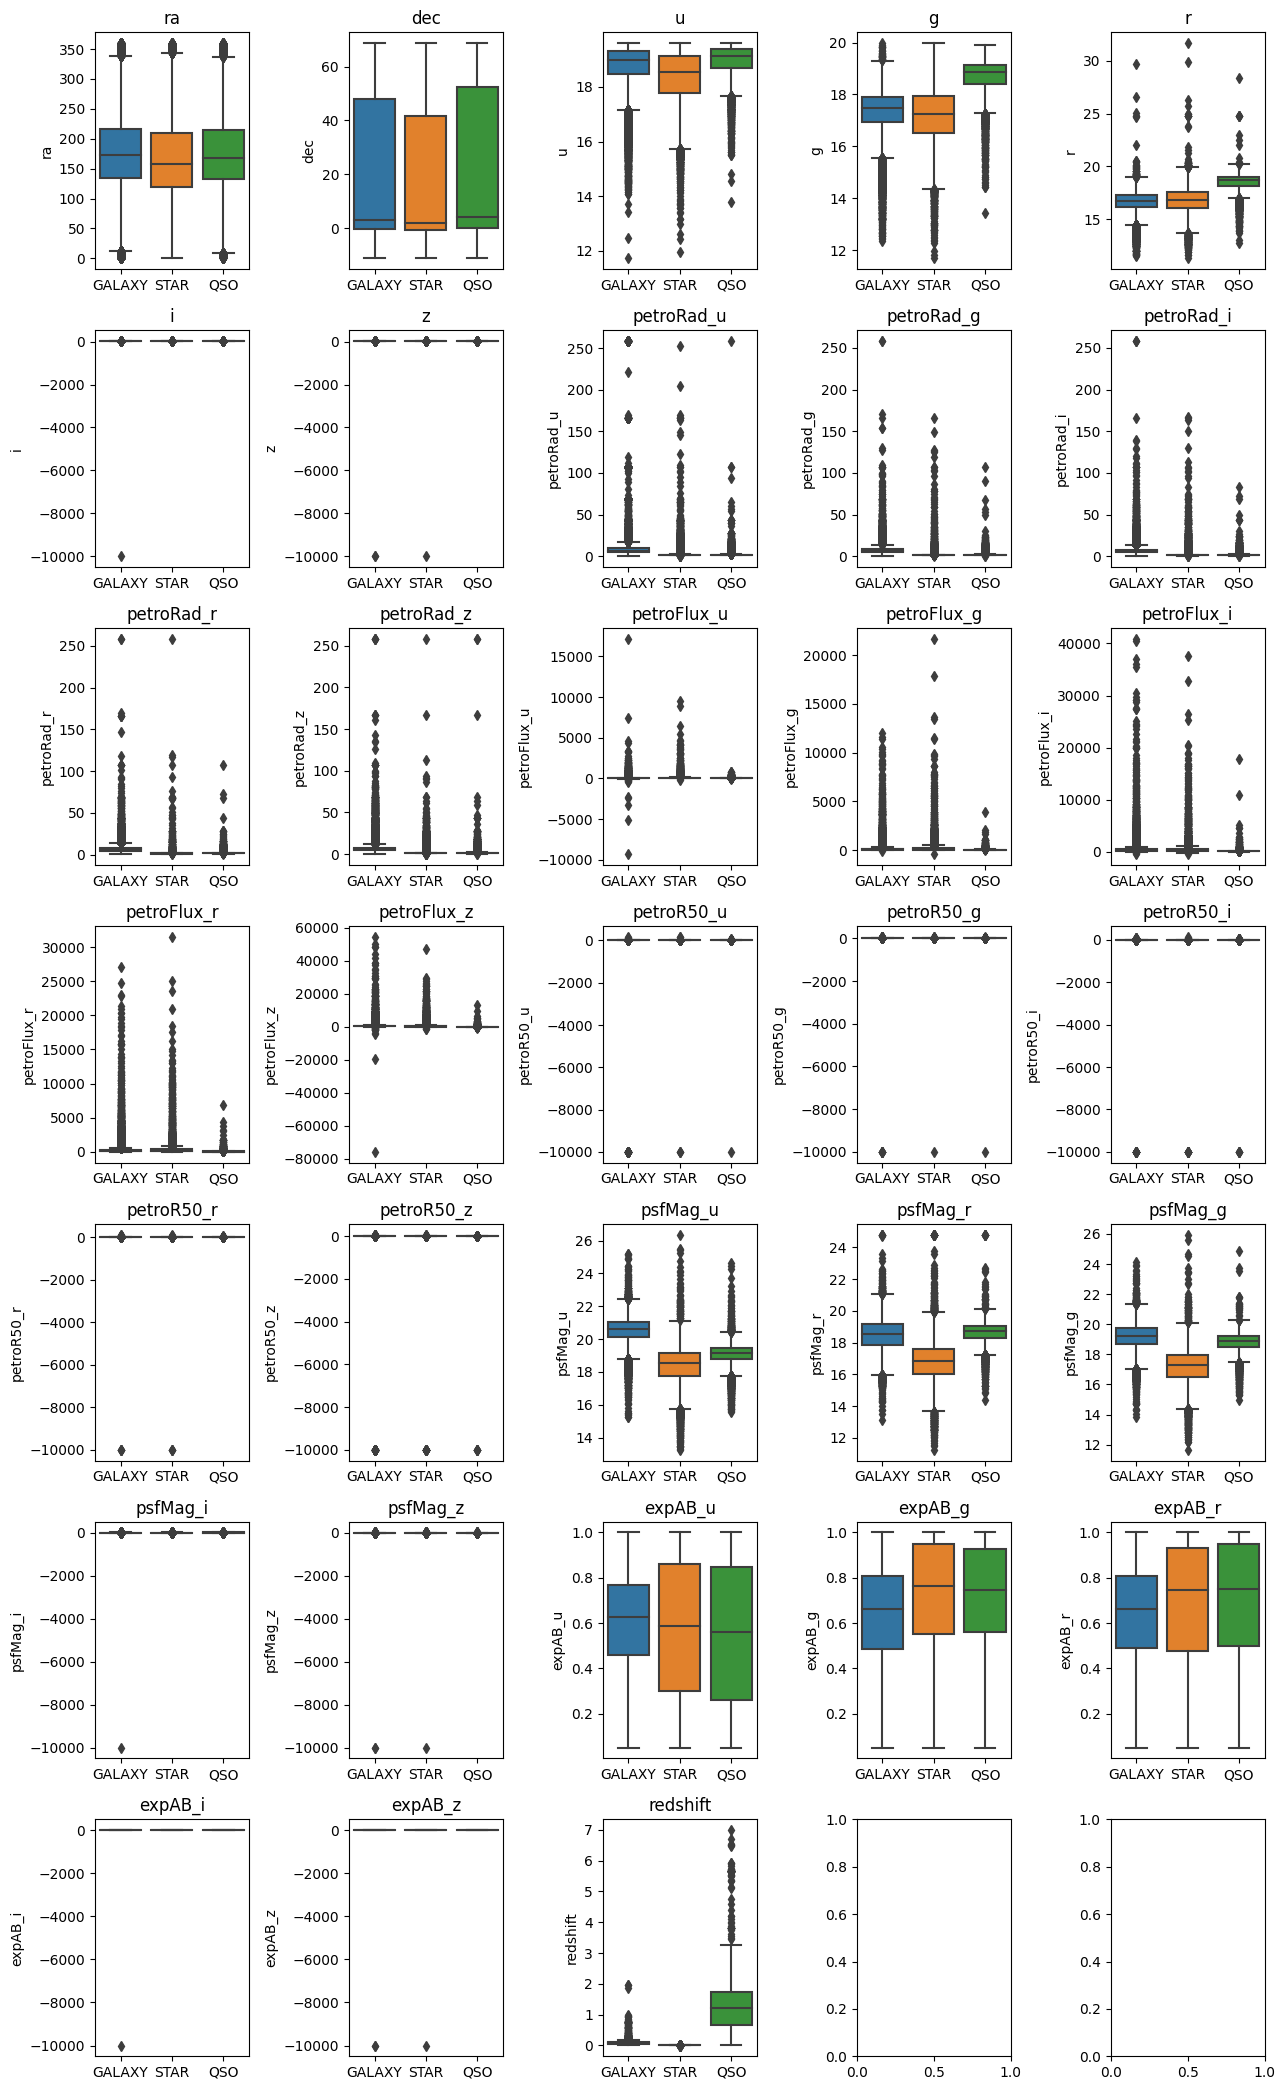

In [13]:
import math

# Assuming 'columns' is a list of column names and 'data' is your DataFrame

num_columns = len(columns)
num_rows = math.ceil(num_columns / 5)

# Create a grid of subplots with a flexible number of rows
fig, axs = plt.subplots(num_rows, 5, figsize=(13, 3* num_rows))

# Flatten the axs array for easier indexing
axs = axs.flatten()

for i, column in enumerate(columns):
    if i < num_columns:
        # Select the appropriate subplot
        ax = axs[i]

        # Create a boxplot in the selected subplot
        sns.boxplot(x=df['class'], y=df[column], ax=ax)
        ax.set_title(column)
        ax.set_ylabel(column)

        # Remove x-label for better layout
        ax.set_xlabel('')
    else:
        # Hide any excess subplots
        fig.delaxes(axs[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap

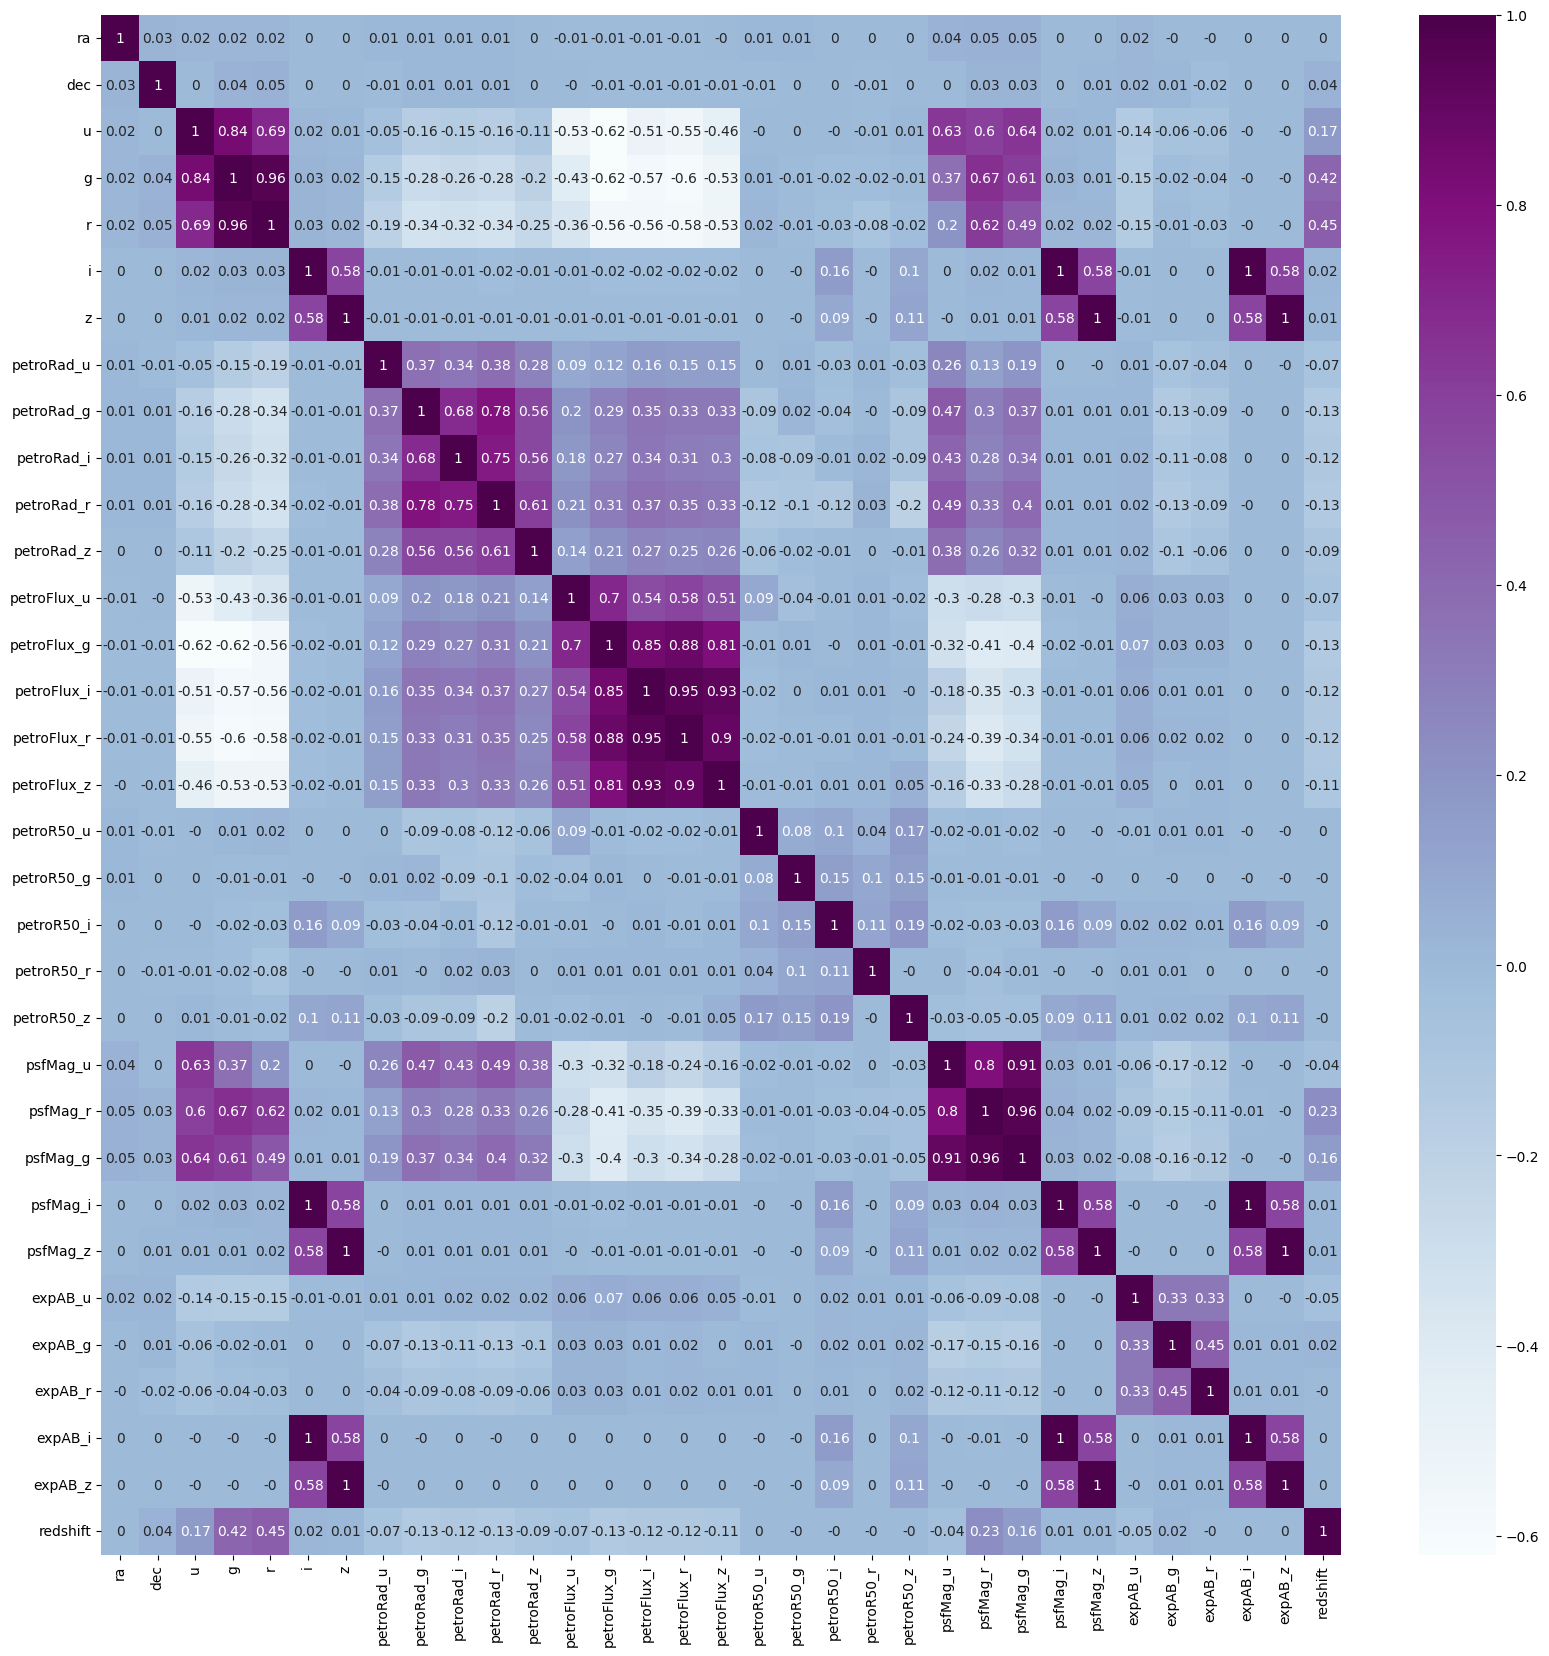

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().round(2),cmap='BuPu', annot=True);

## Creating multivariate (multiple variables) exploratory visualizations to understand your data and search for trends

# **MODELING** 🤖

###We have already identified class imbalance with: 50 percent (52343) rows classified as galaxies, 37232 rows are classified as stars and only 10425 rows as quasars.

In [18]:
#Check class balance
df['class'].value_counts(normalize=True)

GALAXY    0.52343
STAR      0.37232
QSO       0.10425
Name: class, dtype: float64

In [19]:
#Train test split
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
display(X.head())
display(y.head())

,ra,dec,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
0,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691
1,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814
2,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069
3,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087
4,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018


0    GALAXY
1      STAR
2    GALAXY
3      STAR
4      STAR
Name: class, dtype: object

In [29]:
# Define a function to evaluate my 2 models (+ Their Tunied versions)

def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted).round(3)
  recall = recall_score(y_true, y_predicted, average=average).round(3)
  precision = precision_score(y_true, y_predicted, average=average).round(3)
  f1 = f1_score(y_true, y_predicted, average=average).round(3)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

In [32]:
# Create amy 1st Default model pipeline using KNN algorithm
knn = KNeighborsClassifier()
scaler = StandardScaler()
knn_pipe = make_pipeline(scaler, knn)

#Fit and evaluate the baseline model pipeline

knn_pipe.fit(X_train, y_train)
train_preds_K = knn_pipe.predict(X_train)
test_preds_K = knn_pipe.predict(X_test)

# I would like to display the values of my default model's key hyperparameters to be tuned later on :)
# These values will help direct my choice of the ranges to put in GridsearchCV for tuning

# print(f'- What is the number of neighbors used: {knn.n_neighbors}' '\n')
# print(f'- What is the power parameter for the Minkowski metric used: {knn.p}' '\n')
# print(f'- What is the weight used: {knn.weights}' '\n')

print('Training Evaluation Scores\n')
evaluate_classification(y_train, train_preds_K, average = 'macro')
print('\n')
print('Testing Evaluation Scores\n')
evaluate_classification(y_test, test_preds_K, average='macro')

Training Evaluation Scores

Accuracy: 0.986 
Recall: 0.971 
Precision: 0.987 
F1 Score: 0.978


Testing Evaluation Scores

Accuracy: 0.982 
Recall: 0.964 
Precision: 0.983 
F1 Score: 0.973


              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.99     12989
         QSO       0.98      0.91      0.94      2626
        STAR       0.99      0.99      0.99      9385

    accuracy                           0.98     25000
   macro avg       0.98      0.96      0.97     25000
weighted avg       0.98      0.98      0.98     25000



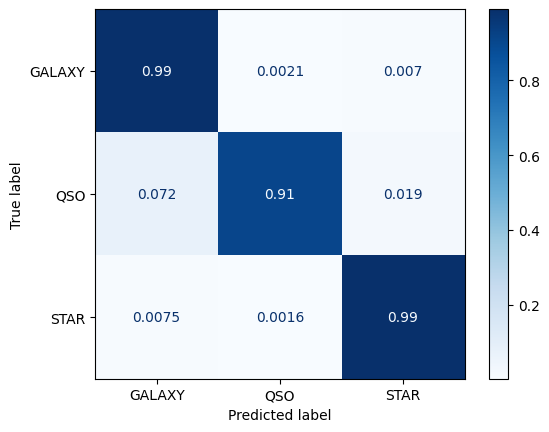

In [33]:
print(classification_report(y_test, test_preds_K))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds_K, normalize='true', cmap='Blues');

              precision    recall  f1-score   support

      GALAXY       0.99      0.98      0.98     12989
         QSO       0.90      0.94      0.92      2626
        STAR       0.99      0.99      0.99      9385

    accuracy                           0.98     25000
   macro avg       0.96      0.97      0.96     25000
weighted avg       0.98      0.98      0.98     25000



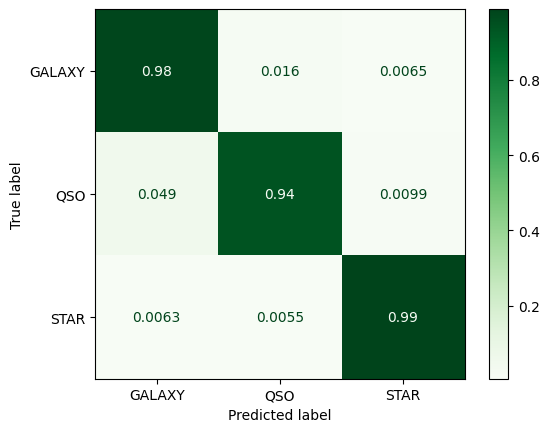

In [37]:
#Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
Knn_smote = KNeighborsClassifier()
Knn_smote_pipe = make_sampler_pipeline(scaler, smote, Knn_smote)
#Fit and evaluate the model pipeline
Knn_smote_pipe.fit(X_train, y_train)
test_preds = Knn_smote_pipe.predict(X_test)
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,normalize='true',cmap='Greens');

In [34]:
# Create amy 2nd Default model pipeline using Randome Forest algorithm
R_F = RandomForestClassifier(random_state = 42)
scaler = StandardScaler()
model_pipeRF = make_pipeline(scaler, R_F)

# Fit the modeling pipeline on the training data
model_pipeRF.fit(X_train, y_train)
y_pred_trainR = model_pipeRF.predict(X_train) # Get predictions for the training data
y_pred_testR = model_pipeRF.predict(X_test) # Get predictions for the testing data


# I would like to display the values of my default model's key hyperparameters to be tuned later on :)
# These values will help direct my choice of the ranges to put in GridsearchCV for tuning

print(f'- What is maximum depth of the random forest tree: {max([estimator.get_depth() for estimator in R_F.estimators_])}' '\n')
print(f'- What is the number of trees in the forest? {R_F.n_estimators}' '\n')
print(f'- What is the minimum number of samples required to be at a leaf node? {R_F.min_samples_leaf}' '\n')
print(f'- What is the min samples split of the forest? {R_F.min_samples_split}' '\n')

print('Training Evaluation Scores\n')
evaluate_classification(y_train, y_pred_trainR, average='macro')

print('\n')

print('Testing Evaluation Scores\n')
evaluate_classification(y_test, y_pred_testR, average='macro')

- What is maximum depth of the random forest tree: 48

- What is the number of trees in the forest? 100

- What is the minimum number of samples required to be at a leaf node? 1

- What is the min samples split of the forest? 2

Training Evaluation Scores

Accuracy: 1.0 
Recall: 1.0 
Precision: 1.0 
F1 Score: 1.0


Testing Evaluation Scores

Accuracy: 0.992 
Recall: 0.984 
Precision: 0.991 
F1 Score: 0.987


              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99     12989
         QSO       0.99      0.96      0.97      2626
        STAR       0.99      1.00      1.00      9385

    accuracy                           0.99     25000
   macro avg       0.99      0.98      0.99     25000
weighted avg       0.99      0.99      0.99     25000



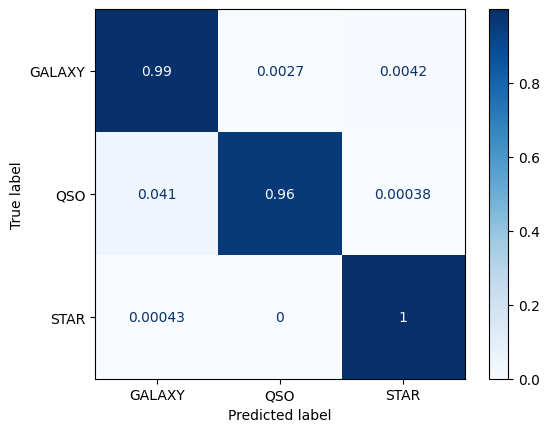

In [35]:
print(classification_report(y_test, y_pred_testR))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_testR, normalize='true', cmap='Blues');

              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99     12989
         QSO       0.98      0.97      0.97      2626
        STAR       0.99      1.00      1.00      9385

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000



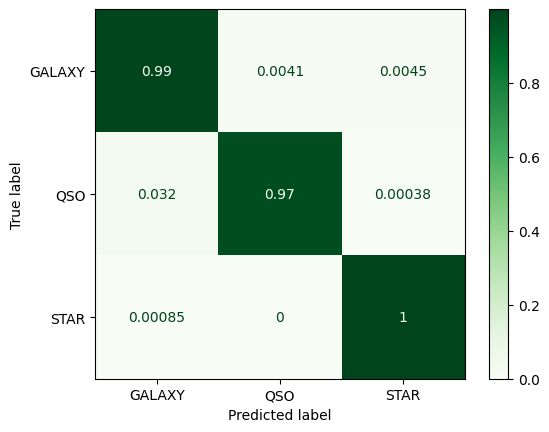

In [36]:
#Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
R_F_smote = RandomForestClassifier(random_state = 42)
R_F_smote_pipe = make_sampler_pipeline(scaler, smote, R_F_smote)
#Fit and evaluate the model pipeline
R_F_smote_pipe.fit(X_train, y_train)
test_preds = R_F_smote_pipe.predict(X_test)
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,normalize='true',cmap='Greens');

              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99     12989
         QSO       0.98      0.96      0.97      2626
        STAR       0.99      1.00      0.99      9385

    accuracy                           0.99     25000
   macro avg       0.99      0.98      0.99     25000
weighted avg       0.99      0.99      0.99     25000



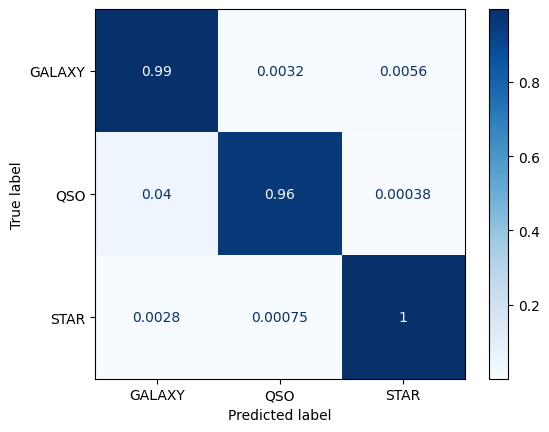

In [26]:
#Create a baseline model pipeline
log_reg = LogisticRegression(max_iter=1000)
scaler = StandardScaler()
log_reg_pipe = make_pipeline(scaler, log_reg)

#Fit and evaluate the baseline model pipeline
log_reg_pipe.fit(X_train, y_train)
test_preds = log_reg_pipe.predict(X_test)

print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize='true', cmap='Blues');

              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99     12989
         QSO       0.96      0.97      0.97      2626
        STAR       0.99      1.00      0.99      9385

    accuracy                           0.99     25000
   macro avg       0.98      0.99      0.98     25000
weighted avg       0.99      0.99      0.99     25000



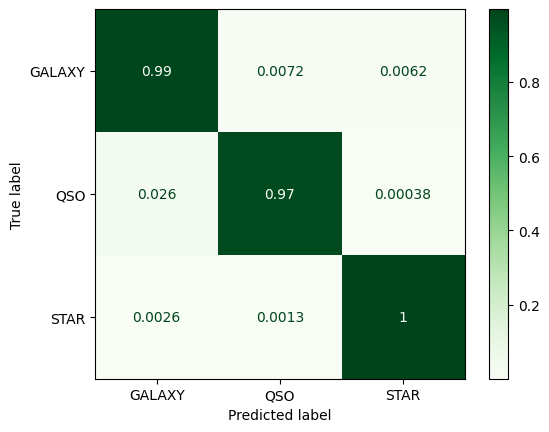

In [28]:
#Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote_pipe = make_sampler_pipeline(scaler, smote, log_reg_smote)
#Fit and evaluate the model pipeline
log_reg_smote_pipe.fit(X_train, y_train)
test_preds = log_reg_smote_pipe.predict(X_test)
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,normalize='true',cmap='Greens');